# Predicting Scores on the Depression Anxiety Stress Scales (DASS) From Responses to the Ten Item Personality Inventory (TIPI)
## This is an interesting look into the association between self-perceived personality and mental health

This dataset was taken from https://www.kaggle.com/datasets/lucasgreenwell/depression-anxiety-stress-scales-responses


In [596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [597]:
# Environment settings: 
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

# Reading and Cleaning DASS Data From Kaggle

In [598]:
# Load the data into a pandas dataframe
df = pd.read_csv('data.csv')

In [599]:
df

,Q1A\tQ1I\tQ1E\tQ2A\tQ2I\tQ2E\tQ3A\tQ3I\tQ3E\tQ4A\tQ4I\tQ4E\tQ5A\tQ5I\tQ5E\tQ6A\tQ6I\tQ6E\tQ7A\tQ7I\tQ7E\tQ8A\tQ8I\tQ8E\tQ9A\tQ9I\tQ9E\tQ10A\tQ10I\tQ10E\tQ11A\tQ11I\tQ11E\tQ12A\tQ12I\tQ12E\tQ13A\tQ13I\tQ13E\tQ14A\tQ14I\tQ14E\tQ15A\tQ15I\tQ15E\tQ16A\tQ16I\tQ16E\tQ17A\tQ17I\tQ17E\tQ18A\tQ18I\tQ18E\tQ19A\tQ19I\tQ19E\tQ20A\tQ20I\tQ20E\tQ21A\tQ21I\tQ21E\tQ22A\tQ22I\tQ22E\tQ23A\tQ23I\tQ23E\tQ24A\tQ24I\tQ24E\tQ25A\tQ25I\tQ25E\tQ26A\tQ26I\tQ26E\tQ27A\tQ27I\tQ27E\tQ28A\tQ28I\tQ28E\tQ29A\tQ29I\tQ29E\tQ30A\tQ30I\tQ30E\tQ31A\tQ31I\tQ31E\tQ32A\tQ32I\tQ32E\tQ33A\tQ33I\tQ33E\tQ34A\tQ34I\tQ34E\tQ35A\tQ35I\tQ35E\tQ36A\tQ36I\tQ36E\tQ37A\tQ37I\tQ37E\tQ38A\tQ38I\tQ38E\tQ39A\tQ39I\tQ39E\tQ40A\tQ40I\tQ40E\tQ41A\tQ41I\tQ41E\tQ42A\tQ42I\tQ42E\tcountry\tsource\tintroelapse\ttestelapse\tsurveyelapse\tTIPI1\tTIPI2\tTIPI3\tTIPI4\tTIPI5\tTIPI6\tTIPI7\tTIPI8\tTIPI9\tTIPI10\tVCL1\tVCL2\tVCL3\tVCL4\tVCL5\tVCL6\tVCL7\tVCL8\tVCL9\tVCL10\tVCL11\tVCL12\tVCL13\tVCL14\tVCL15\tVCL16\teducation\turban\tgender\tengnat\tage\tscreensize\tuniquenetworklocation\thand\treligion\torientation\trace\tvoted\tmarried\tfamilysize\tmajor,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,4\t28\t3890\t4\t25\t2122\t2\t16\t1944\t4\t8\t2044\t4\t34\t2153\t4\t33\t2416\t4\t10\t2818\t4\t13\t2259\t2\t21\t5541\t1\t38\t4441\t4\t31\t2451\t4\t24\t3325\t4\t14\t1416\t4\t37\t5021\t4\t27\t2342\t4\t39\t2480\t3\t6\t2476\t4\t35\t1627\t3\t17\t9050\t3\t30\t7001\t1\t11\t4719\t4\t20\t2984\t4\t36\t1313\t4\t42\t2444\t4\t1\t9880\t4\t2\t4695\t4\t5\t1677\t3\t4\t6723\t4\t3\t5953\t2\t26\t8062\t4\t12\t5560\t4\t7\t3032\t2\t29\t3316\t3\t40\t3563\t4\t23\t5594\t4\t41\t1477\t1\t18\t3885\t2\t9\t5265\t4\t19\t1892...,NaN,NaN,NaN,NaN
1,4\t2\t8118\t1\t36\t2890\t2\t35\t4777\t3\t28\t3090\t4\t10\t5078\t4\t40\t2790\t3\t18\t3408\t4\t1\t8342\t3\t37\t916\t2\t32\t1537\t2\t21\t3926\t2\t25\t3691\t4\t26\t2004\t4\t4\t8888\t3\t27\t4109\t3\t19\t4058\t4\t12\t3692\t2\t6\t3373\t1\t23\t6015\t1\t16\t3023\t2\t22\t2670\t3\t3\t5727\t1\t39\t3641\t2\t33\t2670\t2\t7\t7649\t3\t11\t2537\t3\t5\t2907\t4\t9\t1685\t3\t41\t4726\t3\t17\t6063\t2\t20\t3307\t3\t14\t4995\t3\t38\t2505\t2\t34\t2540\t2\t31\t4359\t3\t15\t3925\t4\t13\t4609\t2\t30\t3755\t2\t42\t2323...,NaN,NaN,NaN,NaN
2,3\t7\t5784\t1\t33\t4373\t4\t41\t3242\t1\t13\t6470\t4\t11\t3927\t3\t9\t3704\t1\t17\t4550\t3\t5\t3021\t2\t32\t5864\t4\t21\t3722\t2\t10\t3424\t1\t36\t3236\t4\t23\t2489\t1\t34\t7290\t4\t12\t6587\t4\t22\t3627\t4\t38\t2905\t2\t18\t2998\t2\t8\t10233\t1\t16\t4258\t4\t28\t2888\t3\t4\t59592\t2\t3\t11732\t4\t2\t8834\t2\t29\t7358\t1\t30\t4928\t2\t15\t3036\t1\t19\t4127\t2\t37\t3934\t2\t26\t10782\t4\t1\t8273\t3\t39\t3501\t1\t27\t3824\t4\t25\t2141\t3\t6\t17461\t4\t24\t1557\t4\t40\t4446\t4\t42\t1883\t2\t35\...,NaN,NaN,NaN,NaN
3,2\t23\t5081\t3\t11\t6837\t2\t37\t5521\t1\t27\t4556\t3\t28\t3269\t3\t26\t3231\t4\t2\t7138\t2\t19\t3079\t3\t31\t9650\t3\t17\t4179\t2\t5\t5928\t1\t21\t2838\t1\t20\t2560\t4\t29\t5139\t2\t22\t3597\t2\t35\t3336\t3\t10\t4506\t1\t14\t2695\t1\t25\t8128\t2\t15\t3125\t1\t6\t4061\t1\t40\t4272\t1\t12\t4029\t1\t9\t5630\t1\t18\t30631\t2\t24\t9870\t4\t4\t2411\t1\t16\t9478\t3\t1\t7618\t3\t32\t12639\t3\t34\t5378\t1\t41\t8923\t2\t38\t2977\t4\t3\t5620\t1\t7\t16760\t1\t8\t6427\t2\t39\t3760\t1\t13\t4112\t3\t42\t2...,NaN,NaN,NaN,NaN
4,2\t36\t3215\t2\t13\t7731\t3\t5\t4156\t4\t10\t2802\t4\t2\t5628\t2\t9\t6522\t4\t34\t2374\t4\t11\t3054\t4\t7\t2975\t3\t14\t3524\t2\t33\t3033\t4\t23\t2132\t4\t17\t1314\t4\t16\t3181\t4\t26\t2249\t3\t19\t2623\t4\t35\t3093\t4\t38\t7098\t4\t37\t1938\t4\t15\t3502\t3\t32\t4776\t3\t18\t4463\t4\t4\t2436\t2\t40\t4047\t4\t31\t3787\t4\t42\t2102\t2\t1\t12351\t4\t3\t2410\t2\t22\t5056\t4\t39\t3343\t3\t27\t3012\t4\t20\t3520\t4\t8\t1868\t4\t25\t2536\t3\t24\t3725\t4\t30\t2130\t3\t29\t3952\t3\t21\t10694\t3\t41\t3...,NaN,NaN,NaN,NaN
...,...,...,...,...,...
39770,2\t31\t3287\t1\t5\t2216\t3\t29\t3895\t2\t37\t2767\t3\t39\t1745\t2\t4\t6424\t1\t36\t3737\t3\t24\t1977\t1\t18\t4089\t4\t34\t1816\t2\t26\t1928\t2\t17\t3159\t4\t32\t2768\t2\t22\t5785\t1\t25\t3969\t3\t41\t2113\t4\t27\t1624\t2\t15\t6759\t4

In [600]:
# Split the values in the 'column_to_split' column on the tab character
df_split = df["Q1A\tQ1I\tQ1E\tQ2A\tQ2I\tQ2E\tQ3A\tQ3I\tQ3E\tQ4A\tQ4I\tQ4E\tQ5A\tQ5I\tQ5E\tQ6A\tQ6I\tQ6E\tQ7A\tQ7I\tQ7E\tQ8A\tQ8I\tQ8E\tQ9A\tQ9I\tQ9E\tQ10A\tQ10I\tQ10E\tQ11A\tQ11I\tQ11E\tQ12A\tQ12I\tQ12E\tQ13A\tQ13I\tQ13E\tQ14A\tQ14I\tQ14E\tQ15A\tQ15I\tQ15E\tQ16A\tQ16I\tQ16E\tQ17A\tQ17I\tQ17E\tQ18A\tQ18I\tQ18E\tQ19A\tQ19I\tQ19E\tQ20A\tQ20I\tQ20E\tQ21A\tQ21I\tQ21E\tQ22A\tQ22I\tQ22E\tQ23A\tQ23I\tQ23E\tQ24A\tQ24I\tQ24E\tQ25A\tQ25I\tQ25E\tQ26A\tQ26I\tQ26E\tQ27A\tQ27I\tQ27E\tQ28A\tQ28I\tQ28E\tQ29A\tQ29I\tQ29E\tQ30A\tQ30I\tQ30E\tQ31A\tQ31I\tQ31E\tQ32A\tQ32I\tQ32E\tQ33A\tQ33I\tQ33E\tQ34A\tQ34I\tQ34E\tQ35A\tQ35I\tQ35E\tQ36A\tQ36I\tQ36E\tQ37A\tQ37I\tQ37E\tQ38A\tQ38I\tQ38E\tQ39A\tQ39I\tQ39E\tQ40A\tQ40I\tQ40E\tQ41A\tQ41I\tQ41E\tQ42A\tQ42I\tQ42E\tcountry\tsource\tintroelapse\ttestelapse\tsurveyelapse\tTIPI1\tTIPI2\tTIPI3\tTIPI4\tTIPI5\tTIPI6\tTIPI7\tTIPI8\tTIPI9\tTIPI10\tVCL1\tVCL2\tVCL3\tVCL4\tVCL5\tVCL6\tVCL7\tVCL8\tVCL9\tVCL10\tVCL11\tVCL12\tVCL13\tVCL14\tVCL15\tVCL16\teducation\turban\tgender\tengnat\tage\tscreensize\tuniquenetworklocation\thand\treligion\torientation\trace\tvoted\tmarried\tfamilysize\tmajor"].str.split('\t', expand=True)

# Concatenate the original dataframe and the new dataframe
df = pd.concat([df, df_split], axis=1)

In [601]:
df

,Q1A\tQ1I\tQ1E\tQ2A\tQ2I\tQ2E\tQ3A\tQ3I\tQ3E\tQ4A\tQ4I\tQ4E\tQ5A\tQ5I\tQ5E\tQ6A\tQ6I\tQ6E\tQ7A\tQ7I\tQ7E\tQ8A\tQ8I\tQ8E\tQ9A\tQ9I\tQ9E\tQ10A\tQ10I\tQ10E\tQ11A\tQ11I\tQ11E\tQ12A\tQ12I\tQ12E\tQ13A\tQ13I\tQ13E\tQ14A\tQ14I\tQ14E\tQ15A\tQ15I\tQ15E\tQ16A\tQ16I\tQ16E\tQ17A\tQ17I\tQ17E\tQ18A\tQ18I\tQ18E\tQ19A\tQ19I\tQ19E\tQ20A\tQ20I\tQ20E\tQ21A\tQ21I\tQ21E\tQ22A\tQ22I\tQ22E\tQ23A\tQ23I\tQ23E\tQ24A\tQ24I\tQ24E\tQ25A\tQ25I\tQ25E\tQ26A\tQ26I\tQ26E\tQ27A\tQ27I\tQ27E\tQ28A\tQ28I\tQ28E\tQ29A\tQ29I\tQ29E\tQ30A\tQ30I\tQ30E\tQ31A\tQ31I\tQ31E\tQ32A\tQ32I\tQ32E\tQ33A\tQ33I\tQ33E\tQ34A\tQ34I\tQ34E\tQ35A\tQ35I\tQ35E\tQ36A\tQ36I\tQ36E\tQ37A\tQ37I\tQ37E\tQ38A\tQ38I\tQ38E\tQ39A\tQ39I\tQ39E\tQ40A\tQ40I\tQ40E\tQ41A\tQ41I\tQ41E\tQ42A\tQ42I\tQ42E\tcountry\tsource\tintroelapse\ttestelapse\tsurveyelapse\tTIPI1\tTIPI2\tTIPI3\tTIPI4\tTIPI5\tTIPI6\tTIPI7\tTIPI8\tTIPI9\tTIPI10\tVCL1\tVCL2\tVCL3\tVCL4\tVCL5\tVCL6\tVCL7\tVCL8\tVCL9\tVCL10\tVCL11\tVCL12\tVCL13\tVCL14\tVCL15\tVCL16\teducation\turban\tgender\tengnat\tage\tscreensize\tuniquenetworklocation\thand\treligion\torientation\trace\tvoted\tmarried\tfamilysize\tmajor,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171
0,4\t28\t3890\t4\t25\t2122\t2\t16\t1944\t4\t8\t2044\t4\t34\t2153\t4\t33\t2416\t4\t10\t2818\t4\t13\t2259\t2\t21\t5541\t1\t38\t4441\t4\t31\t2451\t4\t24\t3325\t4\t14\t1416\t4\t37\t5021\t4\t27\t2342\t4\t39\t2480\t3\t6\t2476\t4\t35\t1627\t3\t17\t9050\t3\t30\t7001\t1\t11\t4719\t4\t20\t2984\t4\t36\t1313\t4\t42\t2444\t4\t1\t9880\t4\t2\t4695\t4\t5\t1677\t3\t4\t6723\t4\t3\t5953\t2\t26\t8062\t4\t12\t5560\t4\t7\t3032\t2\t29\t3316\t3\t40\t3563\t4\t23\t5594\t4\t41\t1477\t1\t18\t3885\t2\t9\t5265\t4\t19\t1892...,NaN,NaN,NaN,NaN,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,
1,4\t2\t8118\t1\t36\t2890\t2\t35\t4777\t3\t28\t3090\t4\t10\t5078\t4\t40\t2790\t3\t18\t3408\t4\t1\t8342\t3\t37\t916\t2\t32\t1537\t2\t21\t3926\t2\t25\t3691\t4\t26\t2004\t4\t4\t8888\t3\t27\t4109\t3\t19\t4058\t4\t12\t3692\t2\t6\t3373\t1\t23\t6015\t1\t16\t3023\t2\t22\t2670\t3\t3\t5727\t1\t39\t3641\t2\t33\t2670\t2\t7\t7649\t3\t11\t2537\t3\t5\t2907\t4\t9\t1685\t3\t41\t4726\t3\t17\t6063\t2\t20\t3307\t3\t14\t4995\t3\t38\t2505\t2\t34\t2540\t2\t31\t4359\t3\t15\t3925\t4\t13\t4609\t2\t30\t3755\t2\t42\t2323...,NaN,NaN,NaN,NaN,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,
2,3\t7\t5784\t1\t33\t4373\t4\t41\t3242\t1\t13\t6470\t4\t11\t3927\t3\t9\t3704\t1\t17\t4550\t3\t5\t3021\t2\t32\t5864\t4\t21\t3722\t2\t10\t3424\t1\t36\t3236\t4\t23\t2489\t1\t34\t7290\t4\t12\t6587\t4\t22\t3627\t4\t38\t2905\t

In [602]:
# drop the unsplit column from the df
df = df.drop(columns=["Q1A\tQ1I\tQ1E\tQ2A\tQ2I\tQ2E\tQ3A\tQ3I\tQ3E\tQ4A\tQ4I\tQ4E\tQ5A\tQ5I\tQ5E\tQ6A\tQ6I\tQ6E\tQ7A\tQ7I\tQ7E\tQ8A\tQ8I\tQ8E\tQ9A\tQ9I\tQ9E\tQ10A\tQ10I\tQ10E\tQ11A\tQ11I\tQ11E\tQ12A\tQ12I\tQ12E\tQ13A\tQ13I\tQ13E\tQ14A\tQ14I\tQ14E\tQ15A\tQ15I\tQ15E\tQ16A\tQ16I\tQ16E\tQ17A\tQ17I\tQ17E\tQ18A\tQ18I\tQ18E\tQ19A\tQ19I\tQ19E\tQ20A\tQ20I\tQ20E\tQ21A\tQ21I\tQ21E\tQ22A\tQ22I\tQ22E\tQ23A\tQ23I\tQ23E\tQ24A\tQ24I\tQ24E\tQ25A\tQ25I\tQ25E\tQ26A\tQ26I\tQ26E\tQ27A\tQ27I\tQ27E\tQ28A\tQ28I\tQ28E\tQ29A\tQ29I\tQ29E\tQ30A\tQ30I\tQ30E\tQ31A\tQ31I\tQ31E\tQ32A\tQ32I\tQ32E\tQ33A\tQ33I\tQ33E\tQ34A\tQ34I\tQ34E\tQ35A\tQ35I\tQ35E\tQ36A\tQ36I\tQ36E\tQ37A\tQ37I\tQ37E\tQ38A\tQ38I\tQ38E\tQ39A\tQ39I\tQ39E\tQ40A\tQ40I\tQ40E\tQ41A\tQ41I\tQ41E\tQ42A\tQ42I\tQ42E\tcountry\tsource\tintroelapse\ttestelapse\tsurveyelapse\tTIPI1\tTIPI2\tTIPI3\tTIPI4\tTIPI5\tTIPI6\tTIPI7\tTIPI8\tTIPI9\tTIPI10\tVCL1\tVCL2\tVCL3\tVCL4\tVCL5\tVCL6\tVCL7\tVCL8\tVCL9\tVCL10\tVCL11\tVCL12\tVCL13\tVCL14\tVCL15\tVCL16\teducation\turban\tgender\tengnat\tage\tscreensize\tuniquenetworklocation\thand\treligion\torientation\trace\tvoted\tmarried\tfamilysize\tmajor"])

In [603]:
# drop the unnamed columns from the df
df = df.drop(columns=['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [604]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,37,2767,3,39,1745,2,4,6424,1,36,3737,3,24,1977,1,18,4089,4,34,1816,2,26,1928,2,17,3159,4,32,2768,2,22,578

In [605]:
# Create a list of new column names
new_col_names=['Q1A','Q1I','Q1E','Q2A','Q2I','Q2E','Q3A','Q3I','Q3E','Q4A','Q4I','Q4E','Q5A','Q5I','Q5E','Q6A','Q6I','Q6E','Q7A','Q7I','Q7E','Q8A','Q8I','Q8E','Q9A','Q9I','Q9E','Q10A','Q10I','Q10E','Q11A','Q11I','Q11E','Q12A','Q12I','Q12E','Q13A','Q13I','Q13E','Q14A','Q14I','Q14E','Q15A','Q15I','Q15E','Q16A','Q16I','Q16E','Q17A','Q17I','Q17E','Q18A','Q18I','Q18E','Q19A','Q19I','Q19E','Q20A','Q20I','Q20E','Q21A','Q21I','Q21E','Q22A','Q22I','Q22E','Q23A','Q23I','Q23E','Q24A','Q24I','Q24E','Q25A','Q25I','Q25E','Q26A','Q26I','Q26E','Q27A','Q27I','Q27E','Q28A','Q28I','Q28E','Q29A','Q29I','Q29E','Q30A','Q30I','Q30E','Q31A','Q31I','Q31E','Q32A','Q32I','Q32E','Q33A','Q33I','Q33E','Q34A','Q34I','Q34E','Q35A','Q35I','Q35E','Q36A','Q36I','Q36E','Q37A','Q37I','Q37E','Q38A','Q38I','Q38E','Q39A','Q39I','Q39E','Q40A','Q40I','Q40E','Q41A','Q41I','Q41E','Q42A','Q42I','Q42E','country','source','introelapse','testelapse','surveyelapse','TIPI1','TIPI2','TIPI3','TIPI4','TIPI5','TIPI6','TIPI7','TIPI8','TIPI9','TIPI10','VCL1','VCL2','VCL3','VCL4','VCL5','VCL6','VCL7','VCL8','VCL9','VCL10','VCL11','VCL12','VCL13','VCL14','VCL15','VCL16','education','urban','gender','engnat','age','screensize','uniquenetworklocation','hand','religion','orientation','race','voted','married','familysize','major']

# Create a dictionary mapping the old column names to the new column names
column_name_mapping = dict(zip(df.columns, new_col_names))

# Use the rename() method to rename the columns
df = df.rename(columns=column_name_mapping)

In [606]:
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [607]:
df = df.apply(pd.to_numeric,errors='ignore')

In [608]:
# get a list of columns that are of object type
object_columns = df.select_dtypes(['object']).columns.tolist()
object_columns

['country', 'major']

# Feature Engineering

## Creating  Depression, Anxiety, and Stress subscale scores
Based on the DASS 42 Score Sheet 

In [609]:
df['Depression']=(df['Q3A']+df['Q5A']+df['Q10A']+df['Q13A']+
                  df['Q16A']+df['Q17A']+df['Q21A']+df['Q24A']+
                  df['Q26A']+df['Q31A']+df['Q34A']+df['Q37A']+
                  df['Q38A']+df['Q42A'])

In [610]:
df['Depression_SD'] = df[['Q3A','Q5A','Q10A','Q13A',
                          'Q16A','Q17A','Q21A','Q24A',
                          'Q26A','Q31A','Q34A','Q37A',
                          'Q38A','Q42A']].std(axis=1)

In [611]:
df['Anxiety']=(df['Q2A']+df['Q4A']+df['Q7A']+df['Q9A']+
                  df['Q15A']+df['Q19A']+df['Q20A']+df['Q23A']+
                  df['Q25A']+df['Q28A']+df['Q30A']+df['Q36A']+
                  df['Q40A']+df['Q41A'])

In [612]:
df['Anxiety_SD'] = df[['Q2A','Q4A','Q7A','Q9A',
                          'Q15A','Q19A','Q20A','Q23A',
                          'Q25A','Q28A','Q30A','Q36A',
                          'Q40A','Q41A']].std(axis=1)

In [613]:
df['Stress']=(df['Q1A']+df['Q6A']+df['Q8A']+df['Q11A']+
                  df['Q12A']+df['Q14A']+df['Q18A']+df['Q22A']+
                  df['Q27A']+df['Q29A']+df['Q32A']+df['Q33A']+
                  df['Q35A']+df['Q39A'])

In [614]:
df['Stress_SD'] = df[['Q1A','Q6A','Q8A','Q11A',
                          'Q12A','Q14A','Q18A','Q22A',
                          'Q27A','Q29A','Q32A','Q33A',
                          'Q35A','Q39A']].std(axis=1)

In [615]:
df['Total']=(df['Q3A']+df['Q5A']+df['Q10A']+df['Q13A']+
                  df['Q16A']+df['Q17A']+df['Q21A']+df['Q24A']+
                  df['Q26A']+df['Q31A']+df['Q34A']+df['Q37A']+
                  df['Q38A']+df['Q42A']+df['Q2A']+df['Q4A']+df['Q7A']+df['Q9A']+
                  df['Q15A']+df['Q19A']+df['Q20A']+df['Q23A']+
                  df['Q25A']+df['Q28A']+df['Q30A']+df['Q36A']+
                  df['Q40A']+df['Q41A']+df['Q1A']+df['Q6A']+df['Q8A']+df['Q11A']+
                  df['Q12A']+df['Q14A']+df['Q18A']+df['Q22A']+
                  df['Q27A']+df['Q29A']+df['Q32A']+df['Q33A']+
                  df['Q35A']+df['Q39A'])

In [616]:
df['Total_SD']=df[['Q3A','Q5A','Q10A','Q13A',
                          'Q16A','Q17A','Q21A','Q24A',
                          'Q26A','Q31A','Q34A','Q37A',
                          'Q38A','Q42A','Q2A','Q4A','Q7A','Q9A',
                          'Q15A','Q19A','Q20A','Q23A',
                          'Q25A','Q28A','Q30A','Q36A',
                          'Q40A','Q41A','Q1A','Q6A','Q8A','Q11A',
                          'Q12A','Q14A','Q18A','Q22A',
                          'Q27A','Q29A','Q32A','Q33A',
                          'Q35A','Q39A']].std(axis=1)

In [617]:
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Depression,Depression_SD,Anxiety,Anxiety_SD,Stress,Stress_SD,Total,Total_SD
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,,41,1.268814,48,0.755929,54,0.534522,143,0.964227
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,,38,0.913874,31,1.050902,41,0.828742,110,0.961513
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,,53,0.801784,26,1.027105,31,0.801784,110,1.208756
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology,30,0.949262,31,1.251373,30,1.099450,91,1.080123
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology,46,0.611250,54,0.534522,43,0.916875,143,0.766987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Creating clinical interpretations of the scale scores
Based on the DASS 42 Score Sheet

### Depression

In [618]:
def dep_interpretation(score):
    if score <= 9:
        return 'Normal'
    elif score <= 13:
        return 'Mild Depression'
    elif score <= 20:
        return 'Moderate Depression'
    elif score <= 27:
        return 'Severe Depression'
    else:
        return 'Extremely Severe Depression'

In [619]:
df['Depression_Classification']=df['Depression'].apply(lambda score: dep_interpretation(score))

In [620]:
df['Depression_Classification'].value_counts()

Extremely Severe Depression    27133
Severe Depression               6569
Moderate Depression             6073
Name: Depression_Classification, dtype: int64

### Anxiety

In [621]:
def anx_interpretation(score):
    if score <= 7:
        return 'Normal'
    elif score <= 9:
        return 'Mild Anxiety'
    elif score <= 14:
        return 'Moderate Anxiety'
    elif score <= 19:
        return 'Severe Anxiety'
    else:
        return 'Extremely Severe Anxiety'

In [622]:
df['Anxiety_Classification']=df['Anxiety'].apply(lambda score: anx_interpretation(score))

In [623]:
df['Anxiety_Classification'].value_counts()

Extremely Severe Anxiety    32885
Severe Anxiety               5976
Moderate Anxiety              914
Name: Anxiety_Classification, dtype: int64

### Stress

In [624]:
def stress_interpretation(score):
    if score <= 14:
        return 'Normal'
    elif score <= 18:
        return 'Mild Stress'
    elif score <= 25:
        return 'Moderate Stress'
    elif score <= 33:
        return 'Severe Stress'
    else:
        return 'Extremely Severe Stress'

In [625]:
df['Stress_Classification']=df['Stress'].apply(lambda score: stress_interpretation(score))

In [626]:
df['Stress_Classification'].value_counts()

Extremely Severe Stress    21863
Severe Stress               9549
Moderate Stress             6125
Mild Stress                 1927
Normal                       311
Name: Stress_Classification, dtype: int64

## Calculating the total time, in milliseconds, to answer the questions for each scale

In [627]:
df['Depression_Time']=(df['Q3E']+df['Q5E']+df['Q10E']+df['Q13E']+
                  df['Q16E']+df['Q17E']+df['Q21E']+df['Q24E']+
                  df['Q26E']+df['Q31E']+df['Q34E']+df['Q37E']+
                  df['Q38E']+df['Q42E'])

In [628]:
df['Anxiety_Time']=(df['Q2E']+df['Q4E']+df['Q7E']+df['Q9E']+
                  df['Q15E']+df['Q19E']+df['Q20E']+df['Q23E']+
                  df['Q25E']+df['Q28E']+df['Q30E']+df['Q36E']+
                  df['Q40E']+df['Q41E'])

In [629]:
df['Stress_Time']=(df['Q1E']+df['Q6E']+df['Q8E']+df['Q11E']+
                  df['Q12E']+df['Q14E']+df['Q18E']+df['Q22E']+
                  df['Q27E']+df['Q29E']+df['Q32E']+df['Q33E']+
                  df['Q35E']+df['Q39E'])

In [630]:
df['Total_Time']=(df['Q3E']+df['Q5E']+df['Q10E']+df['Q13E']+
                  df['Q16E']+df['Q17E']+df['Q21E']+df['Q24E']+
                  df['Q26E']+df['Q31E']+df['Q34E']+df['Q37E']+
                  df['Q38E']+df['Q42E']+df['Q2E']+df['Q4E']+df['Q7E']+df['Q9E']+
                  df['Q15E']+df['Q19E']+df['Q20E']+df['Q23E']+
                  df['Q25E']+df['Q28E']+df['Q30E']+df['Q36E']+
                  df['Q40E']+df['Q41E']+df['Q1E']+df['Q6E']+df['Q8E']+df['Q11E']+
                  df['Q12E']+df['Q14E']+df['Q18E']+df['Q22E']+
                  df['Q27E']+df['Q29E']+df['Q32E']+df['Q33E']+
                  df['Q35E']+df['Q39E'])

## Creating a College Education Variable
- dummy coding major variable

In [631]:
def college(major):
    if major == '':
        return 0
    else:
        return 1

In [632]:
df['College']=df['major'].apply(lambda major: college(major))

In [633]:
df['College'].value_counts()

1    28469
0    11306
Name: College, dtype: int64

## Validity Check
- Sum of the scores from VCL6, VCL9, and VCL12, which are not real words and should have a value of 0
- The higher the value of the validity check, the less likely the rest of the participants responses are valid
- From the Code Book

In [634]:
df['Validity_Check']=(df['VCL6']+df['VCL9']+df['VCL12'])

In [635]:
df['Validity_Check'].value_counts()

0    34583
1     4044
2      822
3      326
Name: Validity_Check, dtype: int64

### creating dummy coded variables that tell if an individual falls under the 'severe' category

In [636]:
# Depression
X3 = df[['Q11A','Q39A',
       'Q5A','Q11A','TIPI4','TIPI9','gender',
      'College','voted']]

def assign_d_severe(df):
    df['d_severe'] = 0
    df.loc[df['Depression'] > 20, 'd_severe'] = 1

assign_d_severe(df)

# Anxiety
def assign_a_severe(df):
    df['a_severe'] = 0
    df.loc[df['Anxiety'] > 14, 'a_severe'] = 1

assign_a_severe(df)

# Stress
def assign_s_severe(df):
    df['s_severe'] = 0
    df.loc[df['Stress'] > 25, 's_severe'] = 1

assign_s_severe(df)

# Depression, Anxiety or Stress
def assign_severe(df):
    df['severe'] = 0
    df.loc[(df['d_severe'] == 1) | (df['a_severe'] == 1) | (df['s_severe'] == 1), 'severe'] = 1

assign_severe(df)

# Data Visualization

## Stress

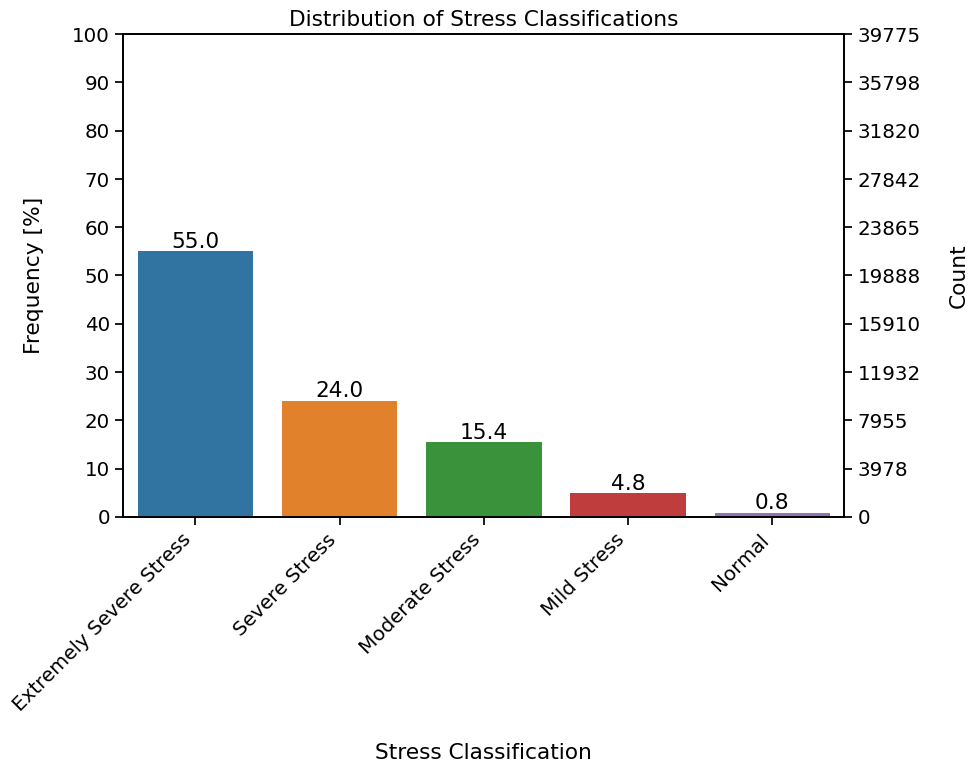

In [639]:
ncount = len(df)
sns.set_context('notebook',font_scale=1.3)
plt.figure(figsize=(10,8))
Stress_Classification = sns.countplot(x='Stress_Classification', data=df, order=['Extremely Severe Stress','Severe Stress','Moderate Stress','Mild Stress','Normal'])
plt.title('Distribution of Stress Classifications')
plt.xlabel('Stress Classification',labelpad=20)
plt.xticks(rotation=45, ha='right')

# Make twin axis
Stress_Classification2=Stress_Classification.twinx()

# Switch so count axis is on right, frequency on left
Stress_Classification2.yaxis.tick_left()
Stress_Classification.yaxis.tick_right()

# Also switch the labels over
Stress_Classification.yaxis.set_label_position('right')
Stress_Classification.set_ylabel('Count',labelpad=20)
Stress_Classification2.yaxis.set_label_position('left')
Stress_Classification2.set_ylabel('Frequency [%]',labelpad=20)

# Use a LinearLocator to ensure the correct number of ticks
Stress_Classification.yaxis.set_major_locator(ticker.LinearLocator(11))
for p in Stress_Classification.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    Stress_Classification.annotate('{:.1f}'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
Stress_Classification.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100

Stress_Classification2.set_ylim(0,100)
Stress_Classification.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
Stress_Classification2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()

Text(-1.1555555555555497, 0.5, 'Count')

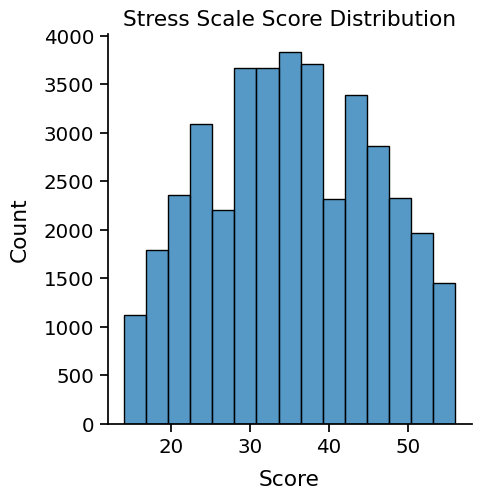

In [715]:
sns.displot(df['Stress'],bins=15)
plt.title('Stress Scale Score Distribution')
plt.xlabel('Score',labelpad=10)
plt.ylabel('Count',labelpad=10)

Text(-1.1555555555555497, 0.5, 'Count')

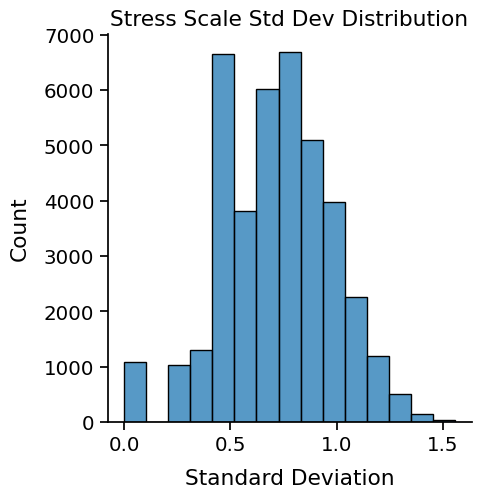

In [716]:
sns.displot(df['Stress_SD'],bins=15)
plt.title('Stress Scale Std Dev Distribution')
plt.xlabel('Standard Deviation',labelpad=10)
plt.ylabel('Count',labelpad=10)

## Viewing all of the features that have a correlation of more than 0.1 with Stress Scale Score 

In [642]:
cor = df.corr(numeric_only=True)
cor_target = abs(cor["Stress"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

Q1A           0.766232
Q2A           0.420764
Q3A           0.599767
Q4A           0.541323
Q5A           0.610471
Q6A           0.726928
Q7A           0.545242
Q8A           0.729494
Q9A           0.626502
Q10A          0.564976
Q11A          0.777389
Q12A          0.710426
Q13A          0.667691
Q14A          0.627127
Q15A          0.517039
Q16A          0.579487
Q17A          0.601669
Q18A          0.640642
Q19A          0.448942
Q20A          0.635548
Q21A          0.588897
Q22A          0.727116
Q23A          0.464498
Q24A          0.590971
Q25A          0.519936
Q26A          0.638052
Q27A          0.758990
Q28A          0.661331
Q29A          0.759864
Q30A          0.603344
Q31A          0.566945
Q32A          0.701044
Q33A          0.717367
Q34A          0.606750
Q35A          0.692138
Q36A          0.645560
Q37A          0.542524
Q38A          0.570636
Q39A          0.746106
Q40A          0.616250
Q41A          0.515610
Q42A          0.547653
TIPI1         0.148030
TIPI2      

## Depression

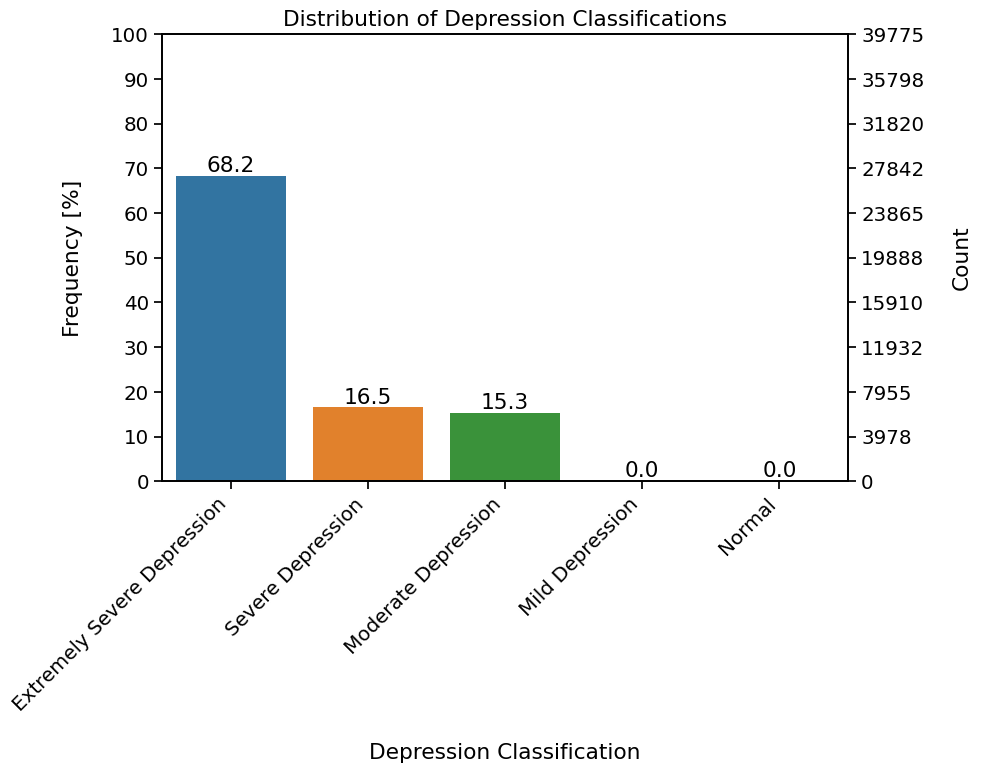

In [753]:
ncount = len(df)
sns.set_context('notebook',font_scale=1.3)
plt.figure(figsize=(10,8))
Depression_Classification = sns.countplot(x='Depression_Classification', data=df, order=['Extremely Severe Depression','Severe Depression','Moderate Depression','Mild Depression','Normal'])
plt.title('Distribution of Depression Classifications')
plt.xlabel('Depression Classification',labelpad=20)
plt.xticks(rotation=45, ha='right')

# Make twin axis
Depression_Classification2=Depression_Classification.twinx()

# Switch so count axis is on right, frequency on left
Depression_Classification2.yaxis.tick_left()
Depression_Classification.yaxis.tick_right()

# Also switch the labels over
Depression_Classification.yaxis.set_label_position('right')
Depression_Classification.set_ylabel('Count',labelpad=20)
Depression_Classification2.yaxis.set_label_position('left')
Depression_Classification2.set_ylabel('Frequency [%]',labelpad=20)

# Use a LinearLocator to ensure the correct number of ticks
Depression_Classification.yaxis.set_major_locator(ticker.LinearLocator(11))
for p in Depression_Classification.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    Depression_Classification.annotate('{:.1f}'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
Depression_Classification.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100

Depression_Classification2.set_ylim(0,100)
Depression_Classification.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
Depression_Classification2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()

Text(-1.1555555555555497, 0.5, 'Count')

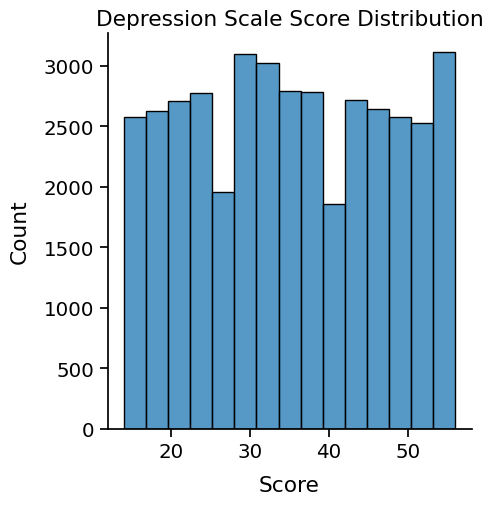

In [757]:
sns.displot(df['Depression'],bins=15)
plt.title('Depression Scale Score Distribution')
plt.xlabel('Score',labelpad=10)
plt.ylabel('Count',labelpad=10)

Text(-1.1555555555555497, 0.5, 'Count')

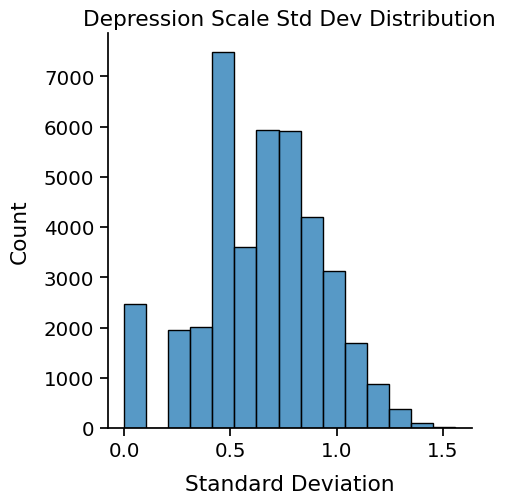

In [756]:
sns.displot(df['Depression_SD'],bins=15)
plt.title('Depression Scale Std Dev Distribution')
plt.xlabel('Standard Deviation',labelpad=10)
plt.ylabel('Count',labelpad=10)

In [758]:
cor = df.corr(numeric_only=True)
cor_target = abs(cor["Depression"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

Q1A           0.587714
Q2A           0.355443
Q3A           0.793075
Q4A           0.442616
Q5A           0.767349
Q6A           0.488819
Q7A           0.440982
Q8A           0.582555
Q9A           0.493562
Q10A          0.831794
Q11A          0.603288
Q12A          0.516265
Q13A          0.815916
Q14A          0.383283
Q15A          0.466672
Q16A          0.804073
Q17A          0.813727
Q18A          0.453773
Q19A          0.354189
Q20A          0.552919
Q21A          0.847284
Q22A          0.577852
Q23A          0.406946
Q24A          0.781789
Q25A          0.414875
Q26A          0.783311
Q27A          0.580521
Q28A          0.520360
Q29A          0.566591
Q30A          0.528852
Q31A          0.771306
Q32A          0.503632
Q33A          0.538878
Q34A          0.824029
Q35A          0.511315
Q36A          0.586015
Q37A          0.806266
Q38A          0.839790
Q39A          0.568014
Q40A          0.501541
Q41A          0.416859
Q42A          0.681171
TIPI1         0.257976
TIPI2      

## Anxiety

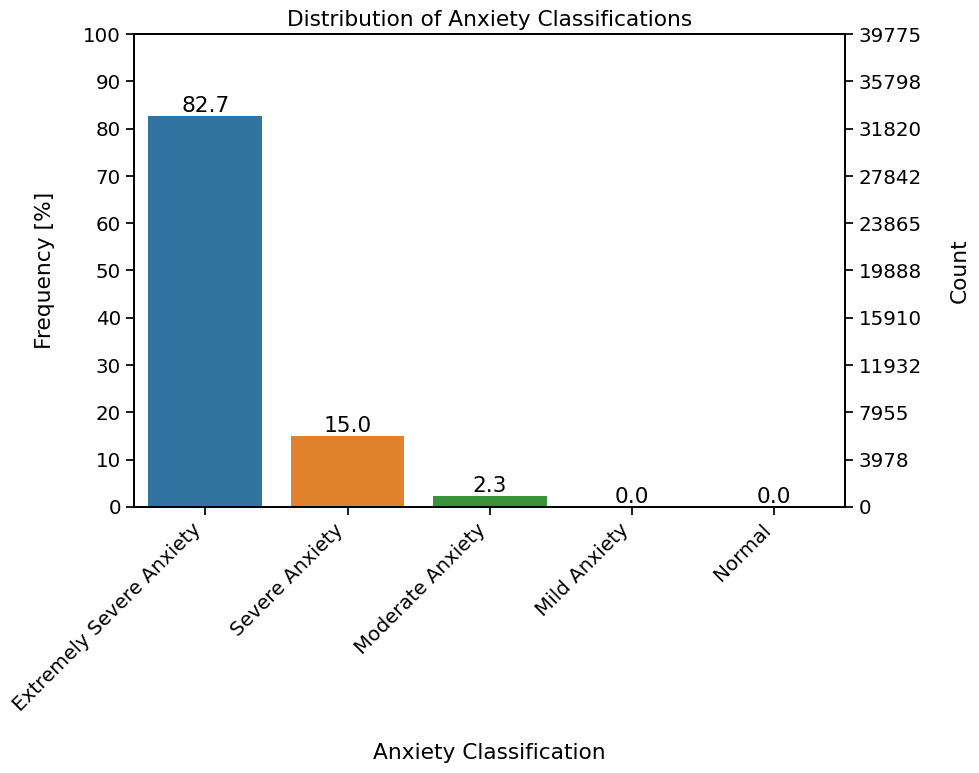

In [775]:
ncount = len(df)
sns.set_context('notebook',font_scale=1.3)
plt.figure(figsize=(10,8))
Anxiety_Classification = sns.countplot(x='Anxiety_Classification', data=df, order=['Extremely Severe Anxiety','Severe Anxiety','Moderate Anxiety','Mild Anxiety','Normal'])
plt.title('Distribution of Anxiety Classifications')
plt.xlabel('Anxiety Classification',labelpad=20)
plt.xticks(rotation=45, ha='right')

# Make twin axis
Anxiety_Classification2=Anxiety_Classification.twinx()

# Switch so count axis is on right, frequency on left
Anxiety_Classification2.yaxis.tick_left()
Anxiety_Classification.yaxis.tick_right()

# Also switch the labels over
Anxiety_Classification.yaxis.set_label_position('right')
Anxiety_Classification.set_ylabel('Count',labelpad=20)
Anxiety_Classification2.yaxis.set_label_position('left')
Anxiety_Classification2.set_ylabel('Frequency [%]',labelpad=20)

# Use a LinearLocator to ensure the correct number of ticks
Anxiety_Classification.yaxis.set_major_locator(ticker.LinearLocator(11))
for p in Anxiety_Classification.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    Anxiety_Classification.annotate('{:.1f}'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
Anxiety_Classification.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100

Anxiety_Classification2.set_ylim(0,100)
Anxiety_Classification.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
Anxiety_Classification2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()

Text(-1.1555555555555497, 0.5, 'Count')

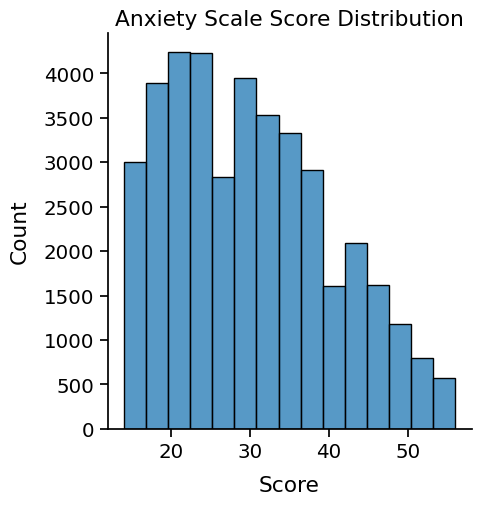

In [776]:
sns.displot(df['Anxiety'],bins=15)
plt.title('Anxiety Scale Score Distribution')
plt.xlabel('Score',labelpad=10)
plt.ylabel('Count',labelpad=10)

Text(-1.1555555555555497, 0.5, 'Count')

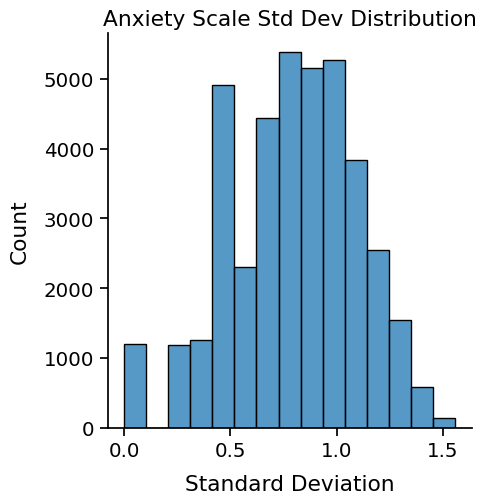

In [777]:
sns.displot(df['Anxiety_SD'],bins=15)
plt.title('Anxiety Scale Std Dev Distribution')
plt.xlabel('Standard Deviation',labelpad=10)
plt.ylabel('Count',labelpad=10)

# Linear Regression Model - Predicting Stress Score on the DASS Based on Responses to The Ten Item Personality Inventory
Gosling, S. D., Rentfrow, P. J., & Swann, W. B., Jr. (2003). A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37, 504-528.

## Identify input features
All the items from the TIPI

In [735]:
# feature specification
X = df[['TIPI1','TIPI2','TIPI3',
        'TIPI4','TIPI5','TIPI6',
        'TIPI7','TIPI8','TIPI9',
        'TIPI10']]

In [736]:
# output specification
y = df['Stress']

In [737]:
from sklearn.model_selection import train_test_split

In [738]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [739]:
# import the model
from sklearn.linear_model import LinearRegression

In [740]:
# specify the model
lm = LinearRegression()

In [741]:
# run the model on the training data
lm.fit(X_train,y_train)

LinearRegression()

In [742]:
# view the intercept of the model
lm.intercept_

28.34417017137295

In [743]:
# view the coefficients of the model features
lm.coef_

array([-0.20463811,  0.5962693 , -0.06337503,  2.24050059, -0.39846276,
        0.15546626,  0.05547334,  0.25111559, -1.72694118, -0.02228054])

In [744]:
X_train.columns

Index(['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8',
       'TIPI9', 'TIPI10'],
      dtype='object')

In [745]:
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])
cdf

,Coeff
TIPI1,-0.204638
TIPI2,0.596269
TIPI3,-0.063375
TIPI4,2.240501
TIPI5,-0.398463
TIPI6,0.155466
TIPI7,0.055473
TIPI8,0.251116
TIPI9,-1.726941
TIPI10,-0.022281


## Predictions

In [746]:
# Generate predictions by running the model with the test data
predictions = lm.predict(X_test)

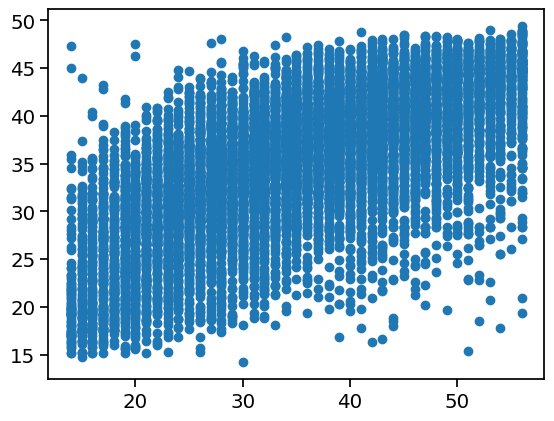

In [747]:
# visualize predictions using a scatter plot
plt.scatter(y_test,predictions)

Text(0.5, 17.84444444444445, 'Residual Values')

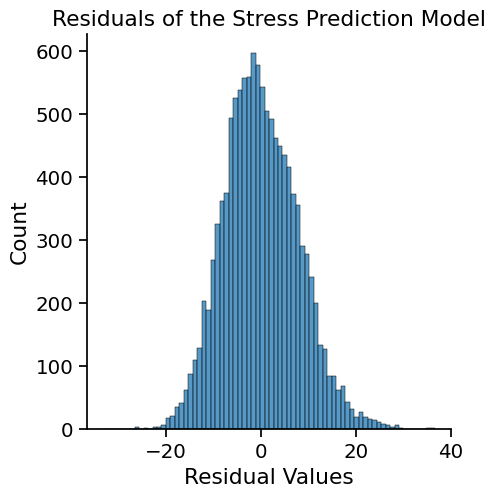

In [748]:
# create histogram of the distribution of the residuals
## the residuals are the difference between the actual test values and the predicted values
sns.displot((y_test-predictions))
plt.title('Residuals of the Stress Prediction Model')
plt.xlabel('Residual Values')

The normal distribution of the residuals indicates that linear regression was an appropriate model choice

## Regression evaluation metrics

In [749]:
from sklearn import metrics

In [750]:
metrics.mean_absolute_error(y_test,predictions)

6.306181644548061

In [751]:
metrics.mean_squared_error(y_test,predictions)

62.569490802020034

In [752]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

7.910087913672012

## An individual's score on the TIPI is able to predict, on average, within 6.3 points, an individual's score on the Stress Scale of the DASS

# Linear Regression Model - Predicting Depression Score on the DASS Based on Responses to The Ten Item Personality Inventory
Gosling, S. D., Rentfrow, P. J., & Swann, W. B., Jr. (2003). A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37, 504-528.

In [759]:
# feature specification
X1 = df[['TIPI1','TIPI2','TIPI3',
        'TIPI4','TIPI5','TIPI6',
        'TIPI7','TIPI8','TIPI9',
        'TIPI10']]

In [760]:
y1 = df['Depression']

In [761]:
# train/test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

In [762]:
# specify the model
lm1 = LinearRegression()
# run the model on the training data
lm1.fit(X1_train,y1_train)

LinearRegression()

In [763]:
# view the intercept of the model
lm1.intercept_

32.799430074339085

In [764]:
# view the coefficients of the model features
lm1.coef_

array([-0.72815783,  0.38536472, -0.39994426,  1.39366195, -0.34709269,
        0.75861501, -0.09151699,  0.66186619, -1.92802058,  0.21940227])

In [765]:
cdf1 = pd.DataFrame(lm1.coef_,X1_train.columns,columns=['Coeff'])
cdf1

,Coeff
TIPI1,-0.728158
TIPI2,0.385365
TIPI3,-0.399944
TIPI4,1.393662
TIPI5,-0.347093
TIPI6,0.758615
TIPI7,-0.091517
TIPI8,0.661866
TIPI9,-1.928021
TIPI10,0.219402


## Predictions

In [767]:
# Generate predictions by running the model with the test data
predictions1 = lm1.predict(X1_test)

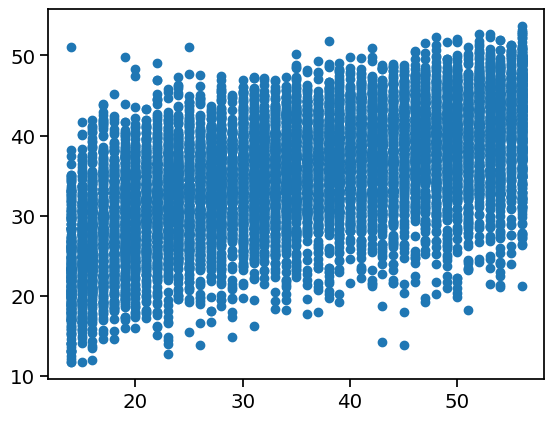

In [768]:
# visualize predictions using a scatter plot
plt.scatter(y1_test,predictions1)

Text(0.5, 17.84444444444445, 'Residual Values')

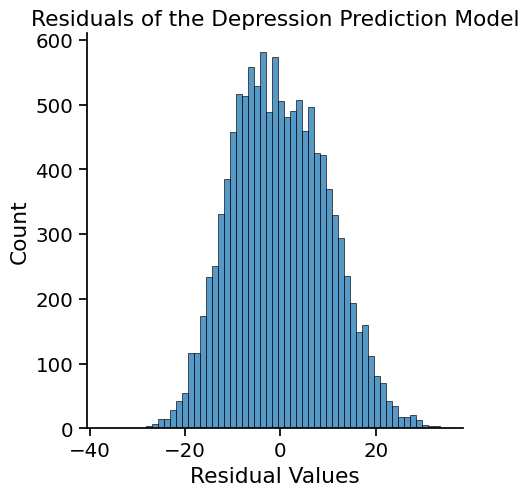

In [769]:
# create histogram of the distribution of the residuals
## the residuals are the difference between the actual test values and the predicted values
sns.displot((y1_test-predictions1))
plt.title('Residuals of the Depression Prediction Model')
plt.xlabel('Residual Values')

In [770]:
metrics.mean_absolute_error(y1_test,predictions1)

8.202746593279999

In [771]:
metrics.mean_squared_error(y1_test,predictions1)

99.74231270690238

In [772]:
np.sqrt(metrics.mean_squared_error(y1_test,predictions1))

9.987107324290772

## An individual's score on the TIPI is able to predict, on average, within 9 points, an individual's score on the Depression Scale of the DASS

# Linear Regression Model - Predicting Anxiety Score on the DASS Based on Responses to The Ten Item Personality Inventory
Gosling, S. D., Rentfrow, P. J., & Swann, W. B., Jr. (2003). A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37, 504-528.

In [779]:
# feature specification
X2 = df[['TIPI1','TIPI2','TIPI3',
        'TIPI4','TIPI5','TIPI6',
        'TIPI7','TIPI8','TIPI9',
        'TIPI10']]

In [780]:
y2 = df['Anxiety']

In [781]:
# train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

In [782]:
# specify the model
lm2 = LinearRegression()
# run the model on the training data
lm2.fit(X2_train,y2_train)

LinearRegression()

In [783]:
# view the intercept of the model
lm2.intercept_

23.99564658051245

In [784]:
# view the coefficients of the model features
lm2.coef_

array([-0.12309501,  0.11115052, -0.14703409,  1.88768682, -0.49863414,
        0.29885723,  0.12752033,  0.40935796, -1.25294915,  0.0369343 ])

In [785]:
cdf2 = pd.DataFrame(lm2.coef_,X2_train.columns,columns=['Coeff'])
cdf2

,Coeff
TIPI1,-0.123095
TIPI2,0.111151
TIPI3,-0.147034
TIPI4,1.887687
TIPI5,-0.498634
TIPI6,0.298857
TIPI7,0.127520
TIPI8,0.409358
TIPI9,-1.252949
TIPI10,0.036934


In [786]:
# Generate predictions by running the model with the test data
predictions2 = lm2.predict(X2_test)

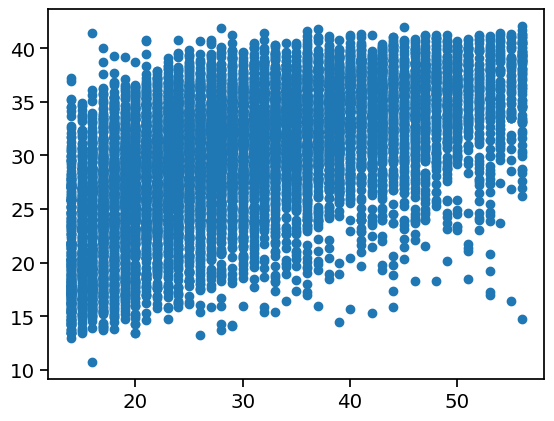

In [787]:
# visualize predictions using a scatter plot
plt.scatter(y2_test,predictions2)

Text(0.5, 17.84444444444445, 'Residual Values')

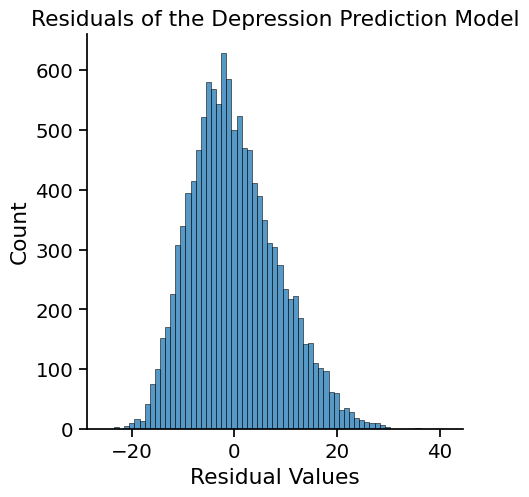

In [788]:
# create histogram of the distribution of the residuals
## the residuals are the difference between the actual test values and the predicted values
sns.displot((y2_test-predictions2))
plt.title('Residuals of the Depression Prediction Model')
plt.xlabel('Residual Values')

In [789]:
metrics.mean_absolute_error(y2_test,predictions2)

6.843304777725007

In [790]:
metrics.mean_squared_error(y2_test,predictions2)

72.98568705440417

In [791]:
np.sqrt(metrics.mean_squared_error(y2_test,predictions2))

8.543166102470686

## An individual's score on the TIPI is able to predict, on average, within 6.8 points, an individual's score on the Anxiety Scale of the DASS